## Test Model 2030

In [1]:
import pypsa 
import matplotlib.pyplot as plt
plt.style.use("bmh")
import pandas as pd
from pypsa.plot import add_legend_patches
import gurobipy
import cartopy.crs as ccrs

#pd.set_option("display.max_rows", None)  # Display all rows
#pd.set_option("display.max_columns", None)  # Display all columns


## Import Network

In [2]:
n = pypsa.Network("C:\\Users\\Jeremy\\Documents\\MasterThesis\\Models\\20240312\\elec_s_37_ec_lv1.5_Co2L0.4-3h.nc")


INFO:pypsa.io:Imported network elec_s_37_ec_lv1.5_Co2L0.4-3h.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [3]:
for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 74 entries
Component 'Carrier' has 23 entries
Component 'GlobalConstraint' has 2 entries
Component 'Line' has 52 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 117 entries
Component 'Load' has 37 entries
Component 'Generator' has 523 entries
Component 'StorageUnit' has 87 entries
Component 'Store' has 37 entries


In [4]:
n.carriers

,co2_emissions,color,nice_name,max_growth,max_relative_growth
Carrier,,,,,
AC,0.0000,#70af1d,AC,inf,0.0
DC,0.0000,#8a1caf,DC,inf,0.0
onwind,0.0000,#235ebc,Onshore Wind,inf,0.0
nuclear,0.0000,#ff8c00,nuclear,inf,0.0
OCGT,0.1980,#e0986c,Open-Cycle Gas,inf,0.0
coal,0.3361,#545454,coal,inf,0.0
offwind-dc,0.0000,#74c6f2,Offshore Wind (DC),inf,0.0
offwind-ac,0.0000,#6895dd,Offshore Wind (AC),inf,0.0
lignite,0.4069,#826837,lignite,inf,0.0


In [5]:
n.generators[n.generators['bus'] == 'AL1 0']

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,p_nom_max,p_max_pu,...,marginal_cost_quadratic,lifetime,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
AL1 0 CCGT,CCGT,AL1 0,0.000000,0.000000e+00,False,0.580,46.813659,104788.020783,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 OCGT,OCGT,AL1 0,0.000000,0.000000e+00,True,0.410,64.694099,47718.670564,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 biomass,biomass,AL1 0,0.000000,0.000000e+00,False,0.468,15.837410,294201.051170,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 coal,coal,AL1 0,0.000000,0.000000e+00,False,0.330,32.223721,337208.027448,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 geothermal,geothermal,AL1 0,0.000000,0.000000e+00,False,1.000,0.010322,0.000000,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 lignite,lignite,AL1 0,0.000000,0.000000e+00,False,0.330,13.265753,337208.027448,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 nuclear,nuclear,AL1 0,0.000000,0.000000e+00,False,0.326,14.023856,753784.215297,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 offwind-ac,offwind-ac,AL1 0,0.000000,0.000000e+00,True,1.000,0.025037,202945.948841,2.711460e+03,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 oil,oil,AL1 0,89.854543,8.985454e+01,False,0.350,157.533723,40086.594536,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0


In [21]:
# set marginal_cost load shedding

# Assuming n.generators.carrier and n.generators.marginal_cost are lists
for i in range(len(n.generators.carrier)):
    if n.generators.carrier[i] == 'load':
        n.generators.marginal_cost[i] = 1500


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_10892\2584797192.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if n.generators.carrier[i] == 'load':
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_10892\2584797192.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignme

In [23]:
n.generators[n.generators['bus'] == 'AL1 0']

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,p_nom_max,p_max_pu,...,marginal_cost_quadratic,lifetime,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
AL1 0 CCGT,CCGT,AL1 0,0.000000,0.000000e+00,False,0.580,46.813659,104788.020783,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 OCGT,OCGT,AL1 0,0.000000,0.000000e+00,True,0.410,64.694099,47718.670564,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 biomass,biomass,AL1 0,0.000000,0.000000e+00,False,0.468,15.837410,294201.051170,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 coal,coal,AL1 0,0.000000,0.000000e+00,False,0.330,32.223721,337208.027448,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 geothermal,geothermal,AL1 0,0.000000,0.000000e+00,False,1.000,0.010322,0.000000,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 lignite,lignite,AL1 0,0.000000,0.000000e+00,False,0.330,13.265753,337208.027448,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 nuclear,nuclear,AL1 0,0.000000,0.000000e+00,False,0.326,14.023856,753784.215297,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 offwind-ac,offwind-ac,AL1 0,0.000000,0.000000e+00,True,1.000,0.025037,202945.948841,2.711460e+03,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
AL1 0 oil,oil,AL1 0,89.854543,8.985454e+01,False,0.350,157.533723,40086.594536,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0


In [24]:
#resolve model
n.lopf(solver_name='gurobi')

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_10892\403696289.py:2: DeprecatedWarning: lopf is deprecated as of 0.24 and will be removed in 1.0. Use linopy-based function ``n.optimize()`` instead. Migrate extra functionalities: https://pypsa.readthedocs.io/en/latest/examples/optimization-with-linopy-migrate-extra-functionalities.html.
  n.lopf(solver_name='gurobi')
INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 34.2s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-09
Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\pypsa-problem-xn5nujfo.lp
Reading time = 23.93 seconds
obj: 6421082 rows, 3075166 columns, 12714246 nonzeros
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 6421082 rows, 3075166 columns and 12714246 nonzeros
Model fingerprint: 0xcb585d1c
Coefficient statistics:
  Matrix range     [1e-03, 2e+03]
  Objective range  [3e-02, 2e+05]
  Bounds range     [9e-02, 3e+10]
  RHS range        [3e-01, 1e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 4350329 rows and 881370 columns (presolve time = 5s) ...
Presolve removed 4350329 rows and 881370

## Plot Network

<function matplotlib.pyplot.show(close=None, block=None)>

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


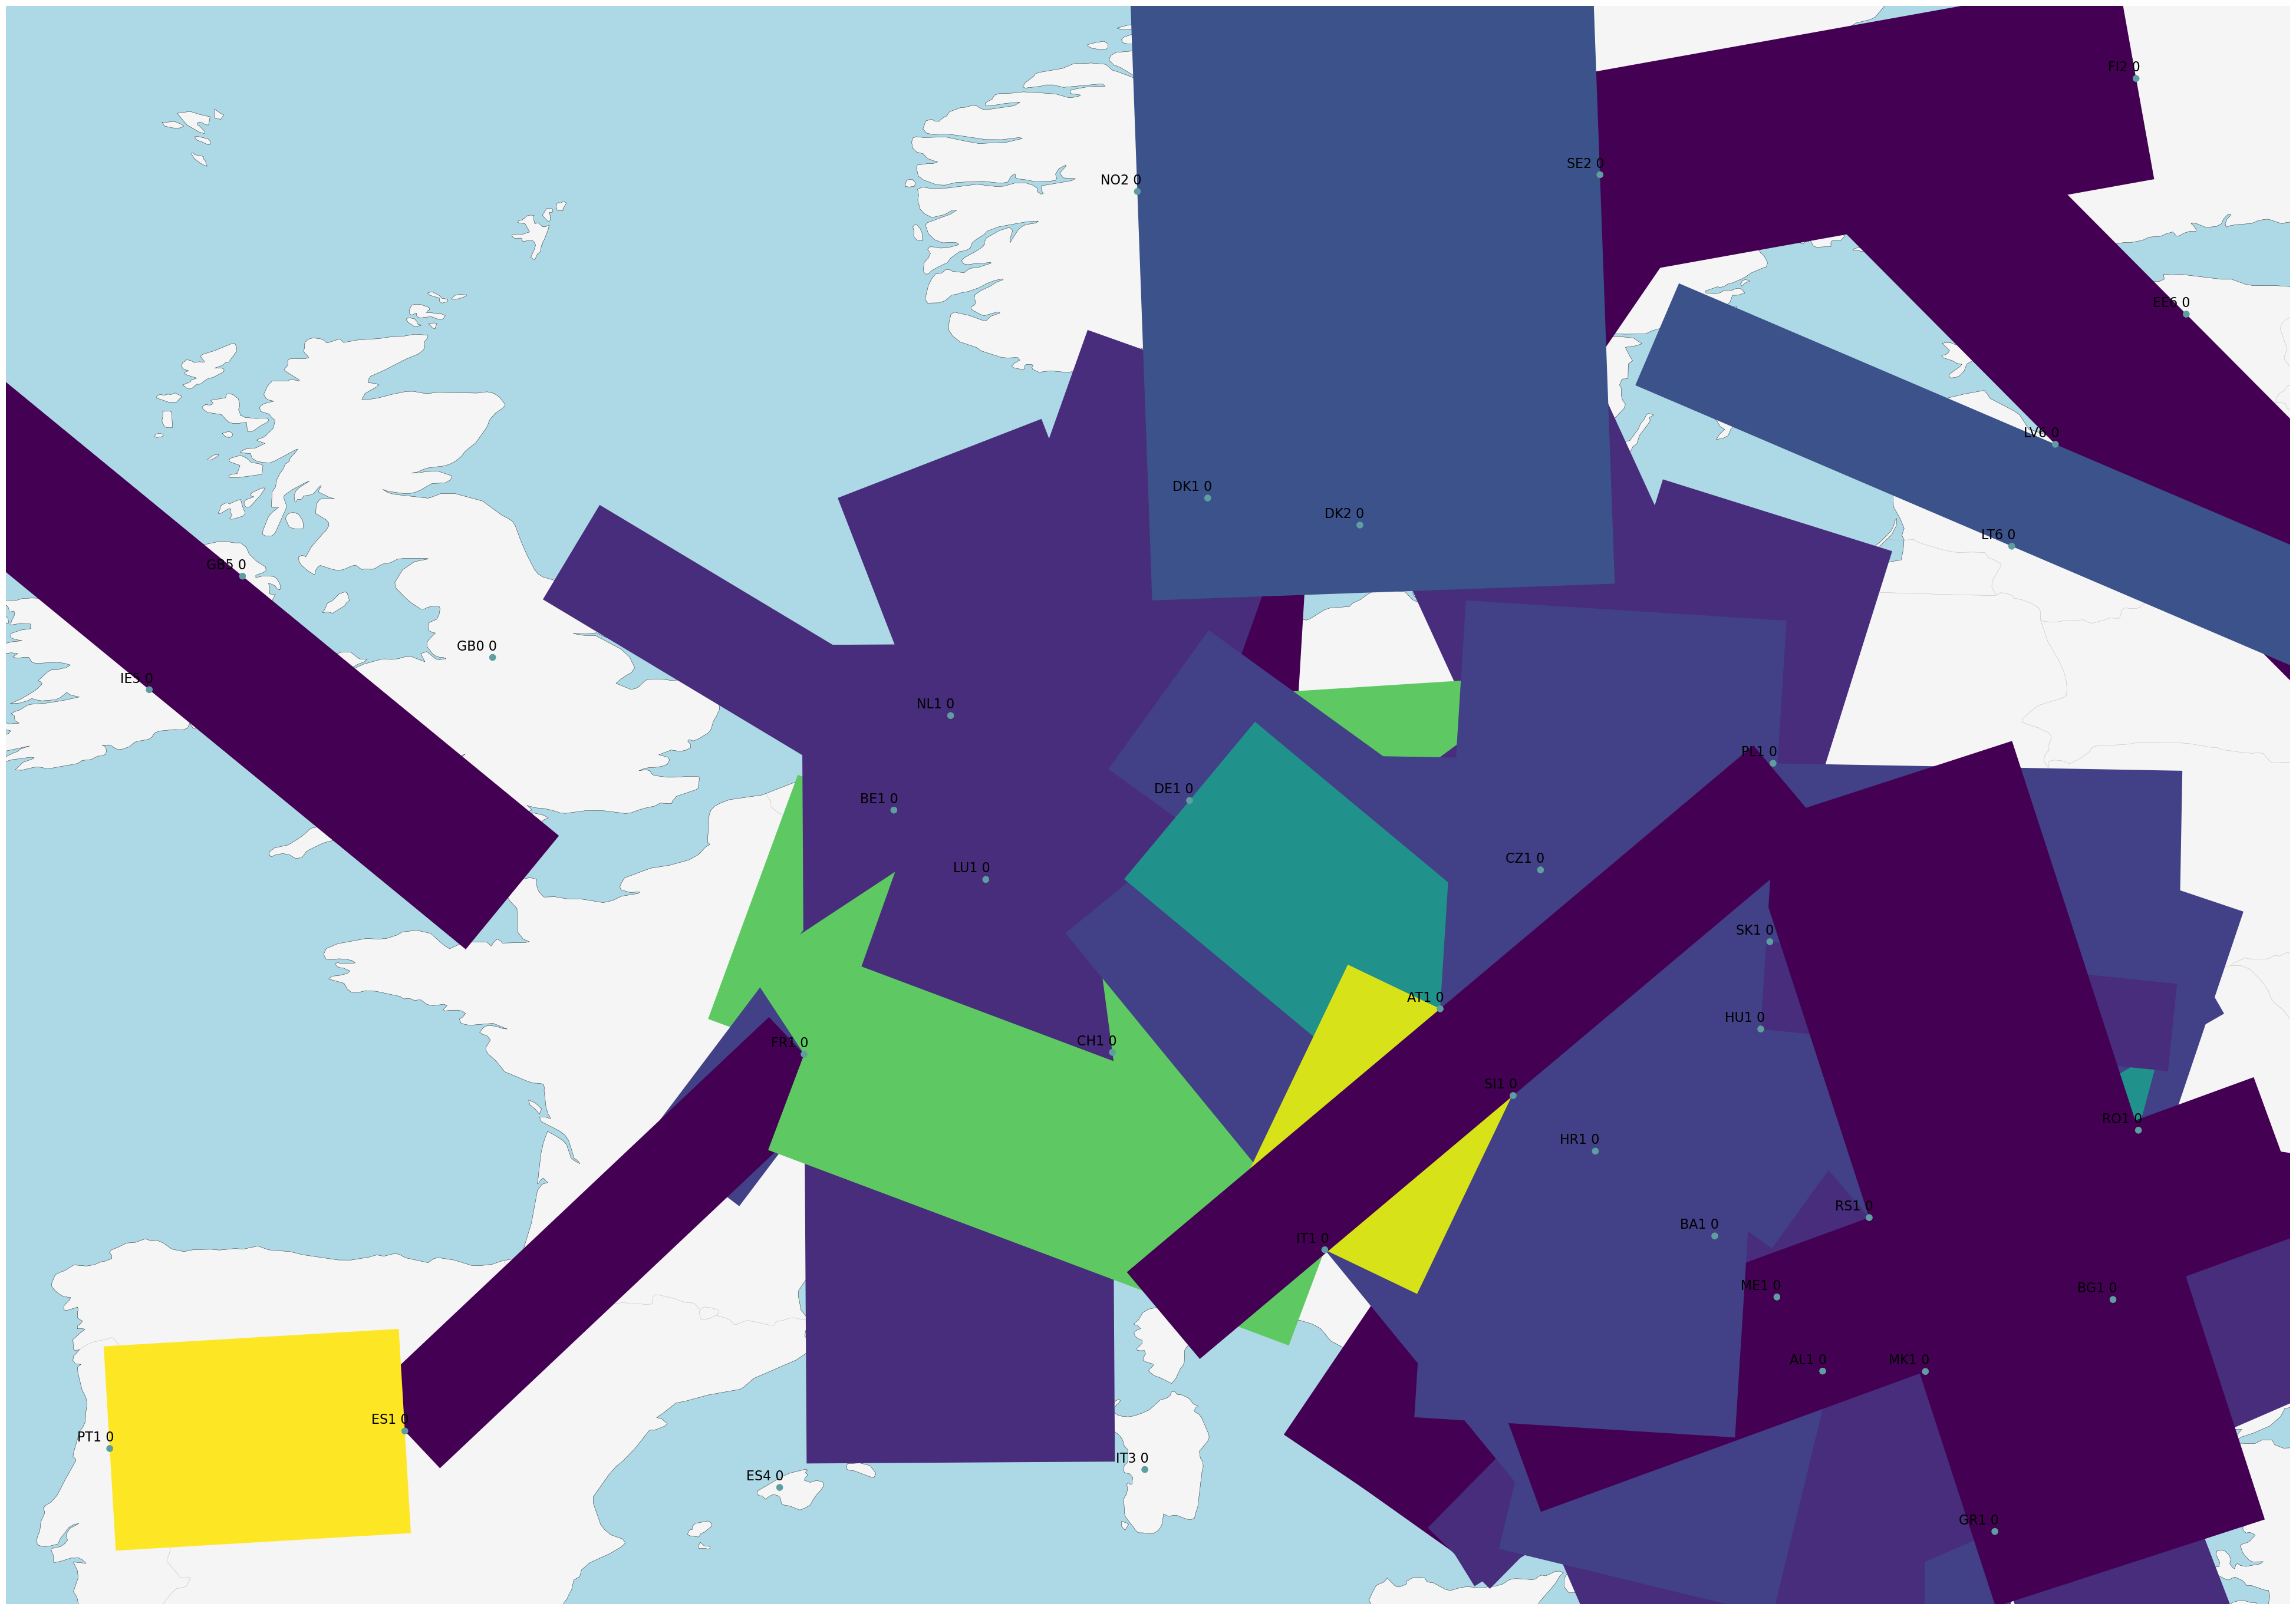

In [14]:
loading = (n.lines_t.p0.abs().mean().sort_index()/(n.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

fig, ax = plt.subplots(
    figsize=(50,50),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

n.plot(
    ax=ax,
    branch_components=["Line"],
    line_widths=n.lines.s_nom_opt/1e7, #GW
    line_colors=loading,
    line_cmap=plt.cm.viridis,
    color_geomap=True,
    bus_sizes=0.003
)

bus = n.buses
region = []
for index, row in bus.iterrows():
    x = row['x']
    y = row['y']
    if "H2" in index:
        pass
    else:
        region.append(index)
        ax.annotate(
        index,
        xy=(x, y),
        xytext=(5, 5),  # Adjust the position of the annotation
        textcoords="offset points",
        ha='right', va='bottom'
    )

plt.show





## Generation

In [19]:
gen = n.generators
carrier = gen.carrier.unique()
def gen_power_table(colors):

    df_tot_generation = n.generators_t.p.sum()

    generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

    for r in region:
        for tech in carrier:
            key = f"{r} {tech}"
            if key in df_tot_generation.index:
                try:
                    generations.loc[r, tech] = df_tot_generation[key]
                except KeyError:
                    print('error')

    plt.figure()
    plt.rcParams.update({'font.size': 16})

    (generations.unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Generated electricity [GWh]",
                                #title=f"Generated electricity in Italy in {year}"
    )

    plt.show()

<Figure size 640x480 with 0 Axes>

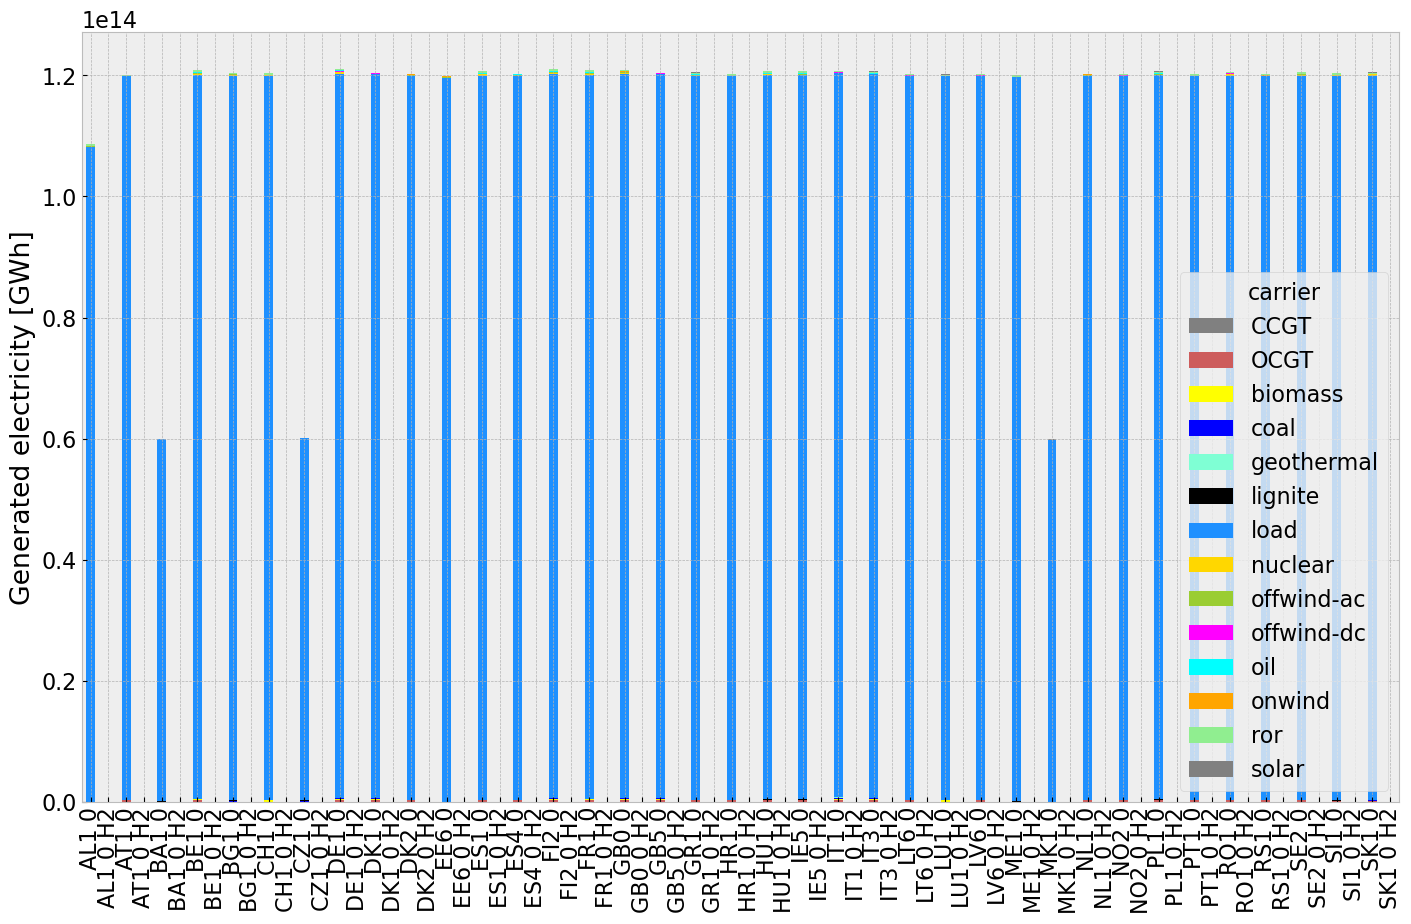

In [24]:
colors = [
    "grey", "indianred", "yellow", "blue", "aquamarine",
    "black", "dodgerblue", "gold", "yellowgreen", "magenta",
    "cyan", "orange", "lightgreen"
]

gen_power_table(colors)

In [25]:
def inst_cap_table(colors,gen):

    capacities = gen.groupby(['bus', 'carrier']).p_nom_opt.sum()
    capacities.fillna(0, inplace=True)

    plt.figure()
    plt.rcParams.update({'font.size': 16})

    (capacities.unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                title=f"Installed power capacity"
    )

    plt.show()

<Figure size 640x480 with 0 Axes>

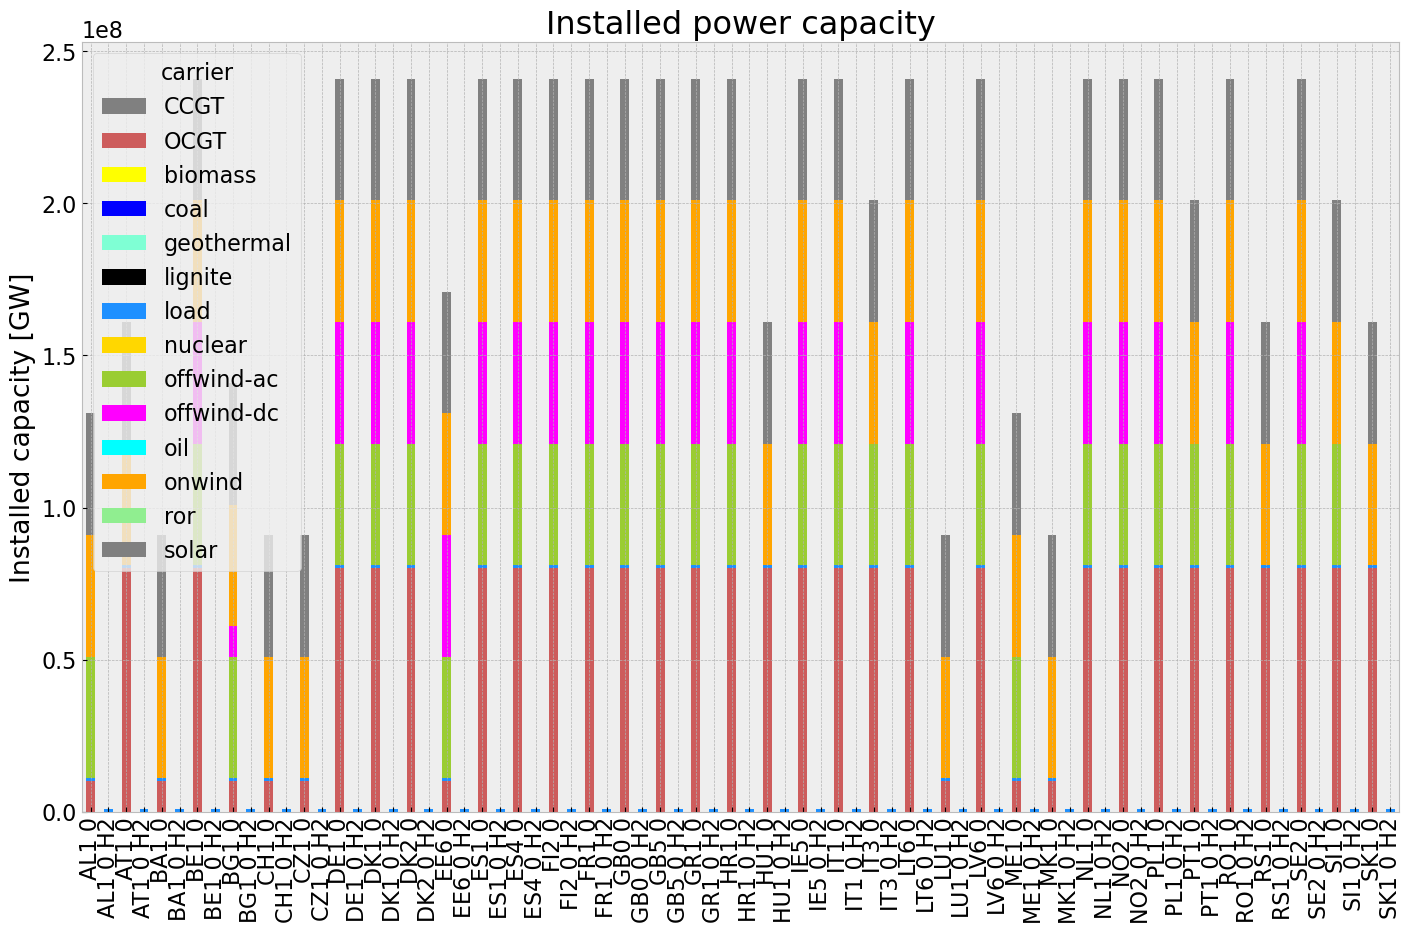

In [26]:
gen = n.generators
inst_cap_table(colors,gen)

In [31]:
def gen_curve_month_summer(colors):

    plt.rcParams.update({'font.size': 16})

    time="2013-03"

    p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
    
    if not n.storage_units.empty:
        sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
        p_by_carrier = pd.concat([p_by_carrier, sto], axis=1)
    
    fig, ax = plt.subplots(figsize=(14, 10))
        
    p_by_carrier.where(p_by_carrier>0).loc[time].plot.area(
        ax=ax,
        linewidth=0,
        color=colors,
        grid=True,

    )
    
    charge = p_by_carrier.where(p_by_carrier<0).dropna(how='all', axis=1).loc[time]
    
    if not charge.empty:

        charge.plot.area(
            ax=ax,
            linewidth=0,
            color=["yellowgreen", "magenta"],
            grid=True,
        )
    
    n.loads_t.p_set.sum(axis=1).loc[time].div(1e3).plot(ax=ax, c='k',grid=True)

    plt.legend(loc=(1.05,0))
    
    ax.set_ylabel("Power [GW]")
    ax.set_title(f"Hourly electricity production")


    ax.set_ylim(-1e10, 5e10)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_3040\2826613164.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_3040\2826613164.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)


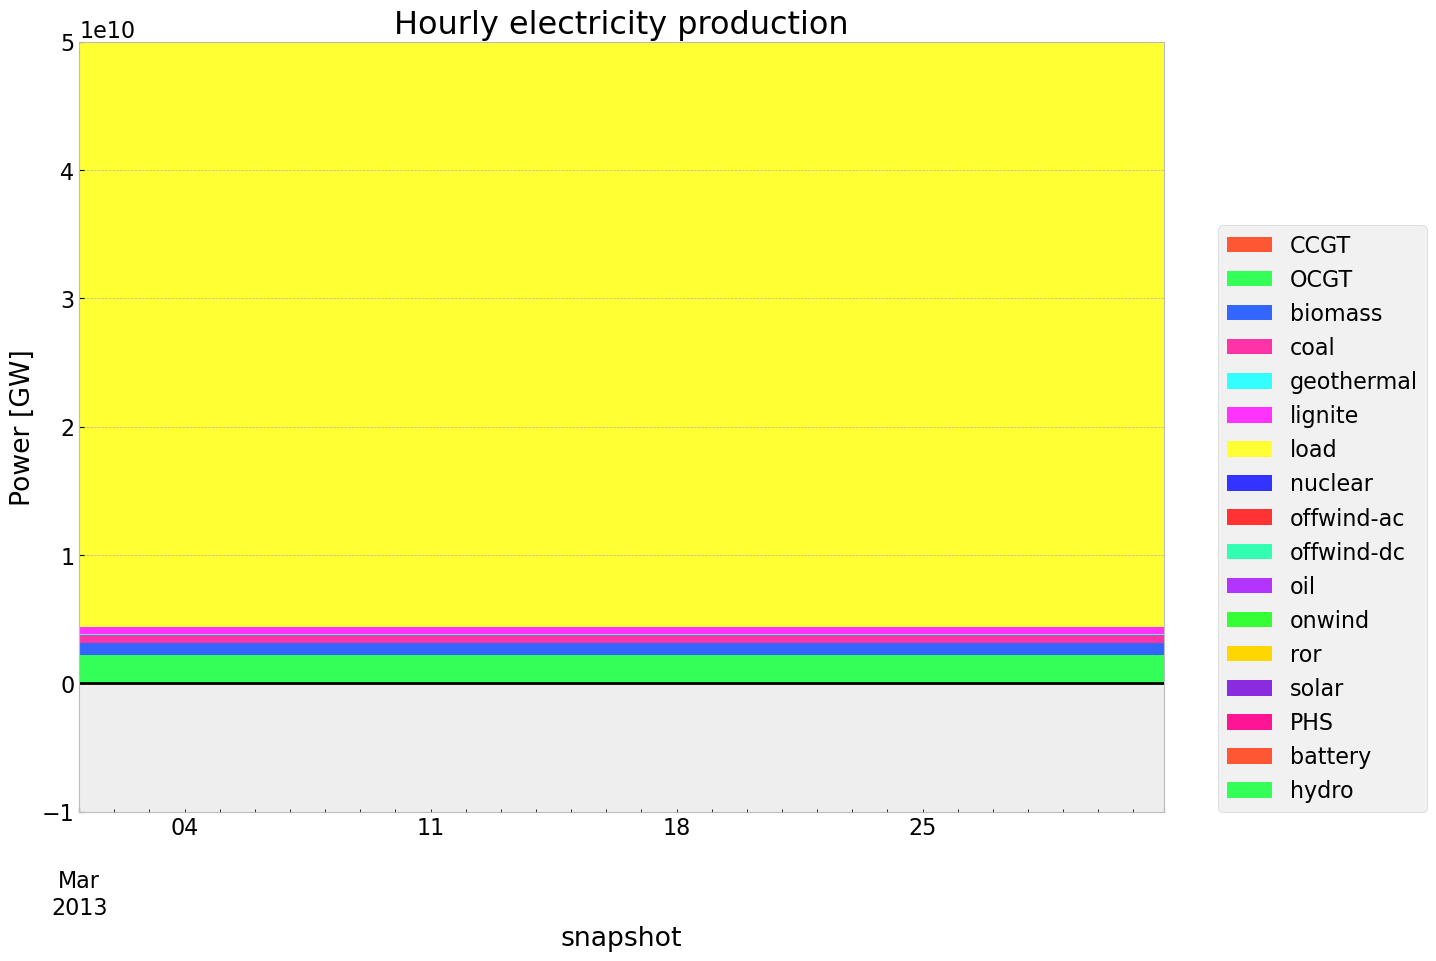

In [32]:
colors_15 = ["#FF5733", "#33FF57", "#3366FF", "#FF33A8", "#33FFFF", "#FF33FF", "#FFFF33", "#3333FF", "#FF3333", "#33FFB3", "#B333FF", "#33FF33", "#FFD700", "#8A2BE2", "#FF1493"]

gen_curve_month_summer(colors_15)

## Demand

In [ ]:
#display demand
#n.loads_t.p_set.div(1e3).plot(figsize=(50,50), ylabel="GW")

In [33]:
n.loads_t.p_set.sum(axis=1).loc['2013-03'].div(1e3)

snapshot
2013-03-01 00:00:00    353.151961
2013-03-01 03:00:00    371.499782
2013-03-01 06:00:00    458.840140
2013-03-01 09:00:00    474.198411
2013-03-01 12:00:00    454.963749
                          ...    
2013-03-31 09:00:00    349.287426
2013-03-31 12:00:00    325.077545
2013-03-31 15:00:00    334.431510
2013-03-31 18:00:00    364.912182
2013-03-31 21:00:00    326.689998
Length: 248, dtype: float64

## Storage

In [ ]:
def inst_store_table():
    
    plt.rcParams.update({'font.size': 16})

    (n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=["yellowgreen","magenta"],
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                #title=f"Installed power capacities of storage systems in Italy in {year}",
                                ylim=[0,50]
    )

    return n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000

In [34]:
inst_store_table()

NameError: name 'inst_store_table' is not defined

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_5536\1019775463.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)


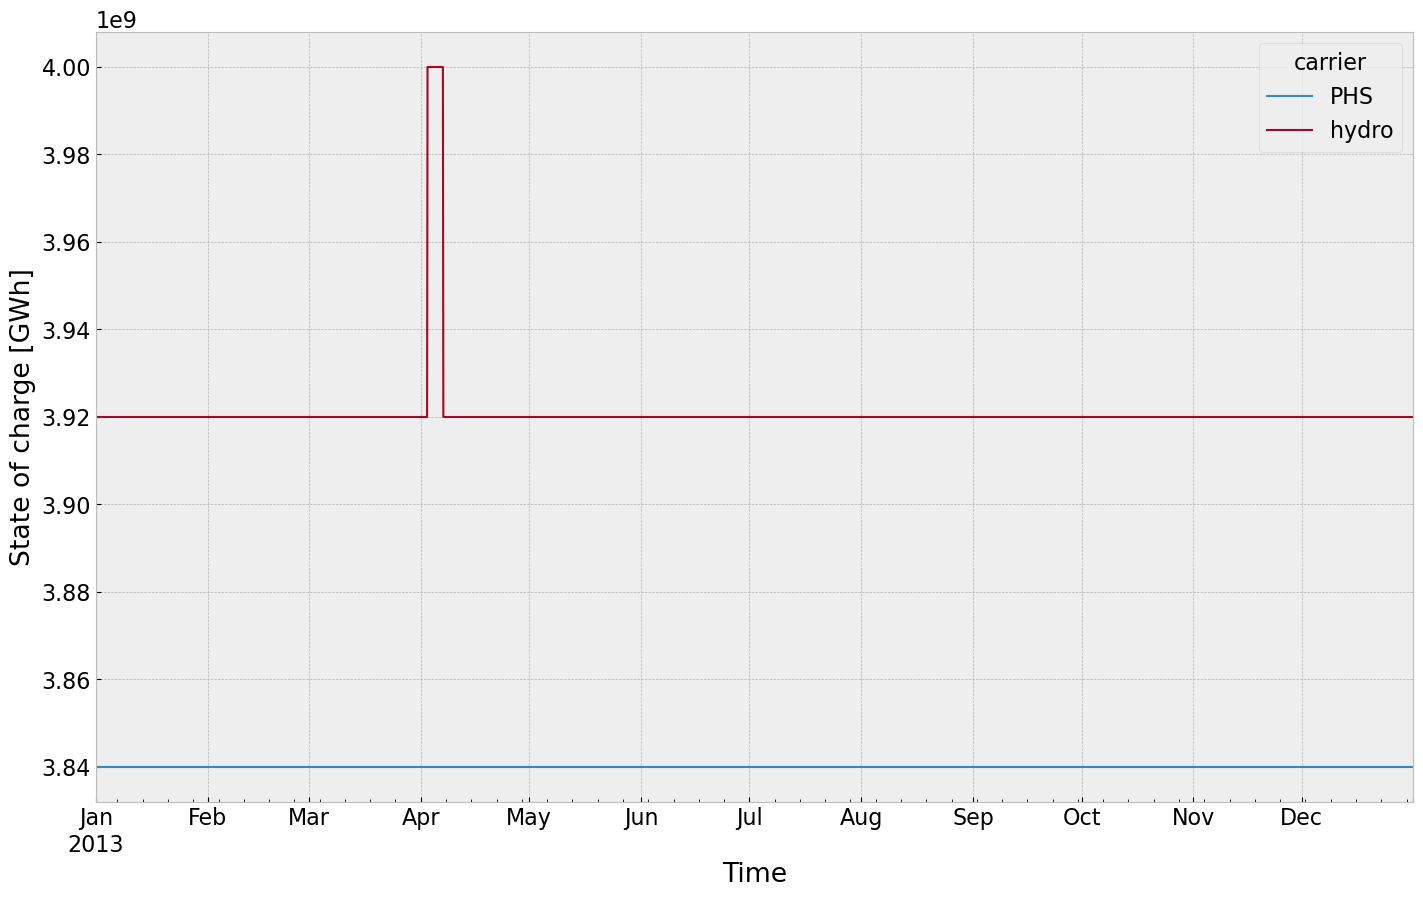

In [ ]:
def state_of_charge_plot():
    
    soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)

    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(17,10))

    soc.plot(ax=ax,
        grid=True,
        ylabel="State of charge [GWh]",
        xlabel="Time",
        #title=f"State of charge of aggregated storage systems in Italy in {year}",
        linewidth=1.5,
)

plt.show()
state_of_charge_plot()

# Germany 
## Installed Capacity

In [ ]:
country_code = 'DE'
gen_DE = n.generators[n.generators.index.str.startswith(country_code)]
gen_DE.head()

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,p_nom_max,p_max_pu,...,marginal_cost_quadratic,lifetime,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
DE1 0 CCGT,CCGT,DE1 0,0.000000,0.000000,False,0.580000,46.812758,104788.020783,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE1 0 OCGT,OCGT,DE1 0,22888.536500,22888.536500,True,0.501555,55.115708,47718.670564,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE1 0 biomass,biomass,DE1 0,8004.647826,8004.647826,False,0.468000,15.838314,294201.051170,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE1 0 coal,coal,DE1 0,8158.220129,8158.220129,False,0.329804,32.243151,337208.027448,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE1 0 geothermal,geothermal,DE1 0,0.000000,0.000000,False,1.000000,0.010850,0.000000,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0


<Figure size 640x480 with 0 Axes>

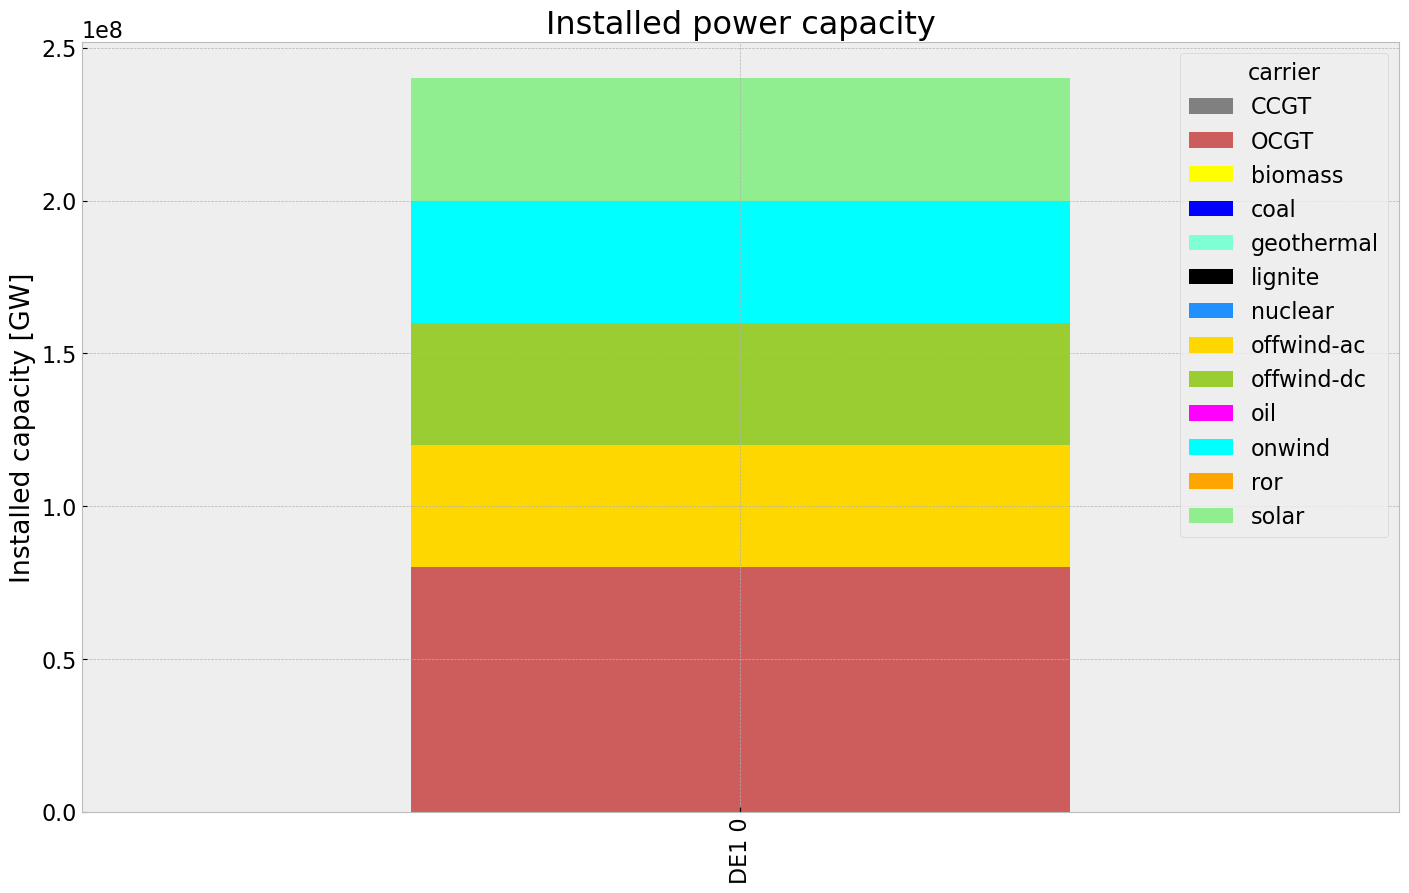

In [ ]:
inst_cap_table(colors,gen_DE)

## Generations

<Figure size 640x480 with 0 Axes>

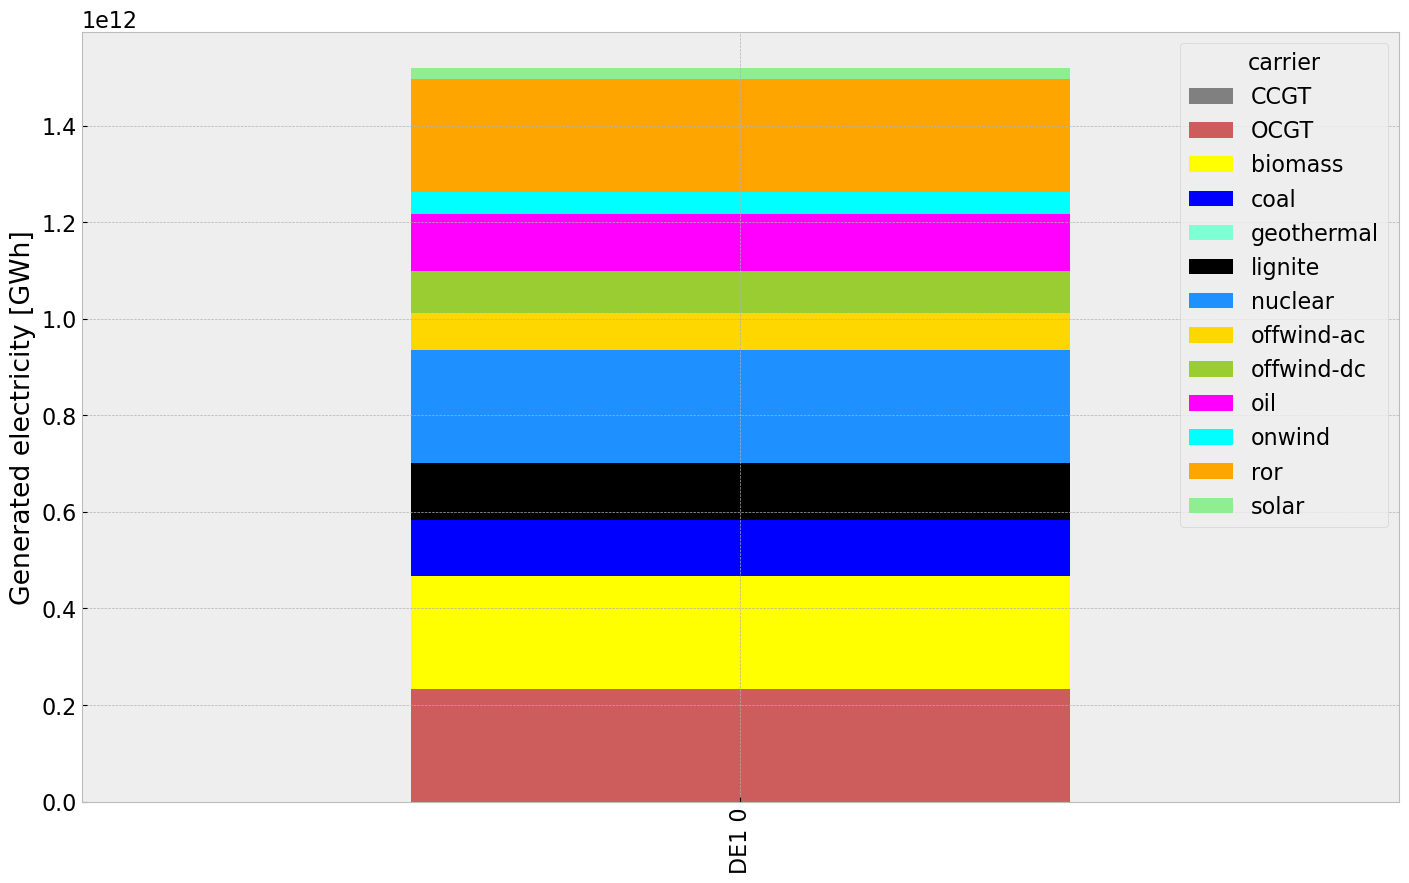

In [ ]:
    df_tot_generation = n.generators_t.p.sum()

    generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

    for r in region:
        for tech in carrier:
            key = f"{r} {tech}"
            if key in df_tot_generation.index:
                try:
                    generations.loc[r, tech] = df_tot_generation[key]
                except KeyError:
                    print('error')

generations = generations.unstack().div(1000)
generations_DE = generations[generations.index.str.startswith(country_code)]#selected country's generation composition in GWh

plt.figure()
    plt.rcParams.update({'font.size': 16})

    generations_DE.plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Generated electricity [GWh]",
                                #title=f"Generated electricity in Italy in {year}"
    )

    plt.show()